In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Leer archivo csv
df_population = pd.read_csv('population_total.csv')
df_population

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


## 1. Hacer una Tabla Pivote

 ##### .pivot(): Devuelve un Dataframe reformado que esta organizado por cierto index/valores de columnas ("tabla pivote sin funciones agregadas")

In [5]:
# Eliminar valores nulos
df_population.dropna(inplace=True)

In [6]:
# Hacer tabla pivote
df_population_pivot = df_population.pivot(index='year', columns='country', values='population')

In [7]:
# Seleccionar algunos paises
df_population_pivot = df_population_pivot[['United States', 'India', 'China', 'Indonesia', 'Brazil']]

In [8]:
# Mostrar tabla pivote
df_population_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


In [61]:
# Exportar dataframe a excel
df_population_pivot.to_excel('tabla_poblacion_pivote.xlsx')

## 2. Lineplot (Grafico de linea)

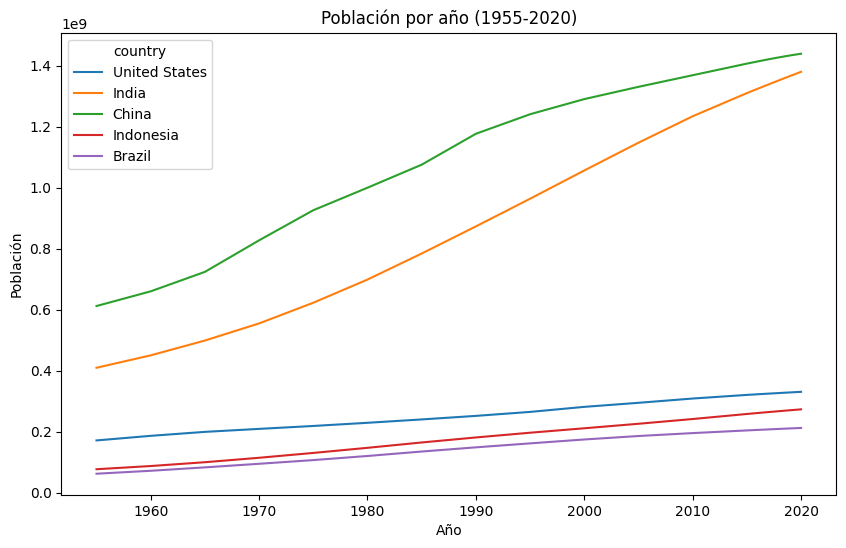

In [60]:
df_population_pivot.plot(kind='line', xlabel='Año', ylabel='Población', title='Población por año (1955-2020)',
                         figsize=(10,6))

# Guardar figure
plt.savefig('my_test.png')
# Mostrar plot
plt.show()

## 3. Barplot (Gráfico de caja)

#### 3.1. Barplot Separados

In [10]:
# Seleccionar solo un año (2020)
df_pivot_2020 = df_population_pivot[df_population_pivot.index.isin([2020])]

In [11]:
# Mostrando un dataframe
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [15]:
# Transponer un dataframe (cambiando filas con columnas y viceversa)
df_pivot_2020 = df_pivot_2020.transpose()


<Axes: title={'center': 'Población en 2020'}, xlabel='Pais', ylabel='Población'>

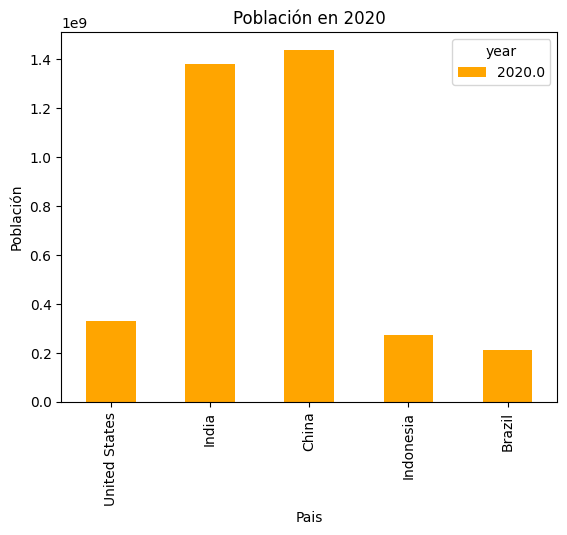

In [23]:
# Hacer el barplot
df_pivot_2020.plot(kind='bar', color='orange',
                   xlabel='Pais', ylabel='Población', 
                   title="Población en 2020")

##### 3.2 Barplot agrupado por "n" Variables

In [24]:
# Seleccinar unos años 
df_pivot_n = df_population_pivot[df_population_pivot.index.isin([1980, 1990, 2000, 2010, 2020])]

<Axes: title={'center': 'Población (1980-2020)'}, xlabel='Años', ylabel='Población'>

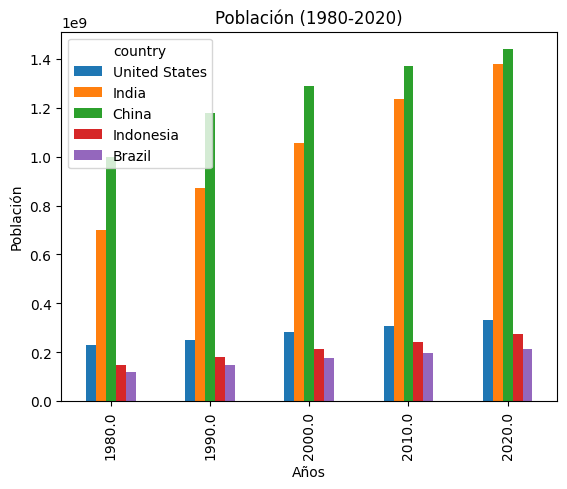

In [27]:
# Haciendo barplot agrupados
df_pivot_n.plot(kind='bar', xlabel='Años', ylabel="Población",
                title="Población (1980-2020)")

### 4 Piechart

In [30]:
# Cambiando el nombre de columna
df_pivot_2020.rename(columns={2020:"2020"}, inplace=True)

<Axes: title={'center': 'Poblacion en 2020(%)'}, ylabel='2020'>

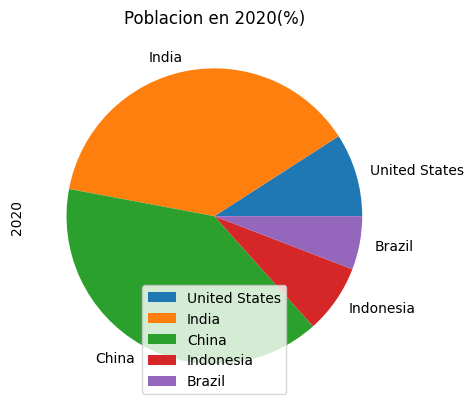

In [34]:
# Haciendo el piechart
df_pivot_2020.plot(kind='pie', y='2020', title='Poblacion en 2020(%)')


### 5. Boxplot

In [41]:
df_population_pivot['United States']

year
1955.0    171685336.0
1960.0    186720571.0
1965.0    199733676.0
1970.0    209513341.0
1975.0    219081251.0
1980.0    229476354.0
1985.0    240499825.0
1990.0    252120309.0
1995.0    265163745.0
2000.0    281710909.0
2005.0    294993511.0
2010.0    309011475.0
2015.0    320878310.0
2016.0    323015995.0
2017.0    325084756.0
2018.0    327096265.0
2019.0    329064917.0
2020.0    331002651.0
Name: United States, dtype: float64

##### 5.1 Boxplot

<Axes: ylabel='Poblacion'>

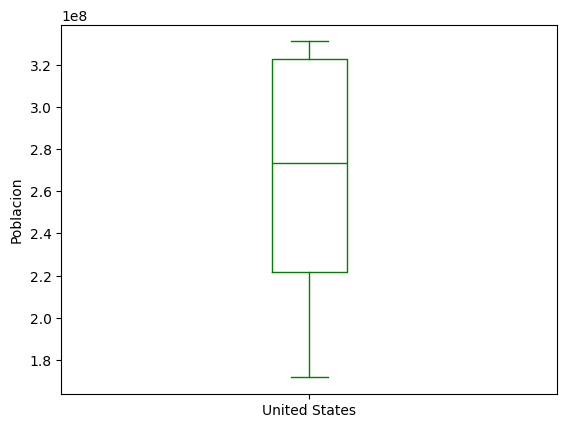

In [40]:
df_population_pivot['United States'].plot(kind='box', color='green', 
                                          ylabel='Poblacion')

##### Múltiples Boxplot

<Axes: xlabel='Paises', ylabel='Poblacion'>

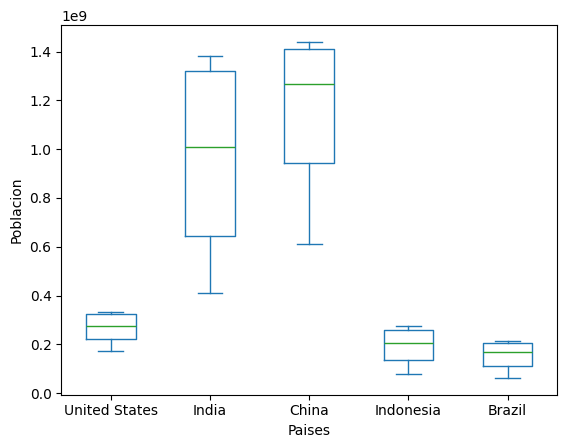

In [43]:
df_population_pivot.plot(kind='box', xlabel='Paises', ylabel='Poblacion')

### 6. Histograma

<Axes: ylabel='Frequency'>

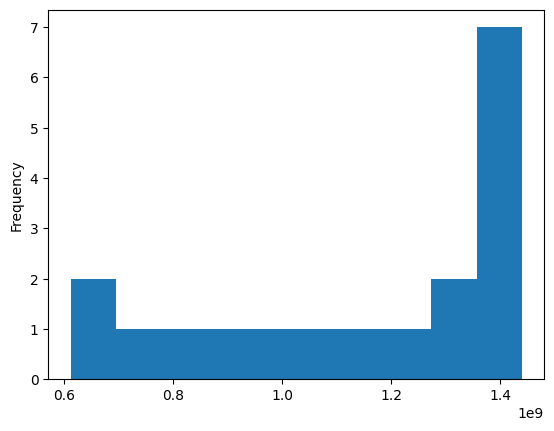

In [45]:
df_population_pivot['China'].plot(kind='hist')

<Axes: ylabel='Frequency'>

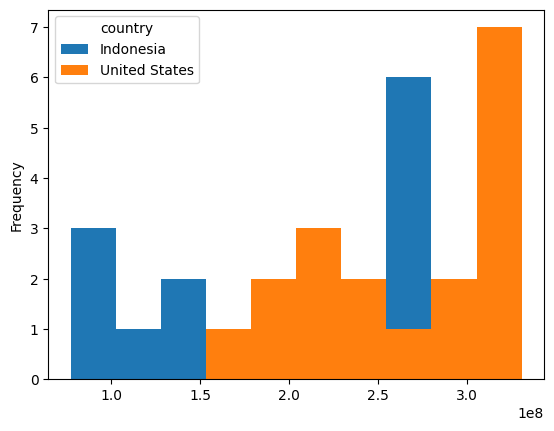

In [47]:
df_population_pivot[['Indonesia', 'United States']].plot(kind='hist')

### 7. Scatterplot (Grafico de dispersion)

In [53]:
# Seleccionar una muestra de la data
df_population_sample = df_population[df_population['country'].isin(['United States', 'India', 'China', 'Indonesia', 'Brazil'])]

<Axes: xlabel='year', ylabel='population'>

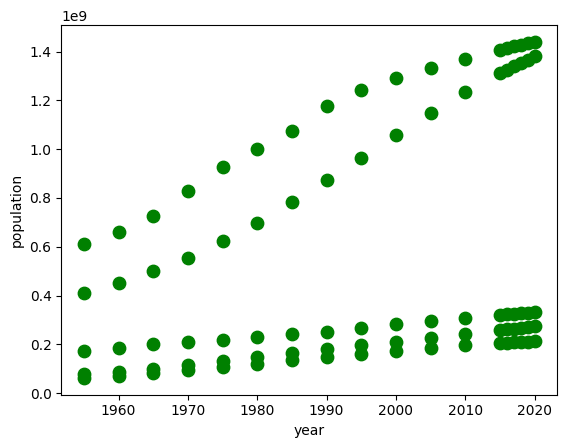

In [57]:
# Haciendo el plot
df_population_sample.plot(kind='scatter', x='year', y='population',
                          s=80,
                          color='green')